<a href="https://colab.research.google.com/github/allineBrito/Elei-es-2016-x-2020/blob/main/candidatos2016_2020%20por_cor_ou_raca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cand2016 = pd.read_csv('/content/drive/MyDrive/eleições/candidatos/candidatos2016.csv', sep=';', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
cand2020 = pd.read_csv('/content/drive/MyDrive/eleições/candidatos/candidatos2020.csv', sep=';', encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ***2016***

In [ ]:
cand2016.info()

In [8]:
selecao_situacao=cand2016['DS_SITUACAO_CANDIDATURA']=="INAPTO"
situacao=cand2016[selecao_situacao]
quantidade_total_de_candidatos=cand2016.shape[0]
quantidade_de_candidatos_inaptos=situacao.shape[0]

print("{} candidatos de um total de {} estão inaptos a concorrer.". format(quantidade_de_candidatos_inaptos,quantidade_total_de_candidatos))


28055 candidatos de um total de 498340 estão inaptos a concorrer.


In [34]:
cand2016['NM_UE'].nunique()
## O Brasil tem 5570 municípios. Em 275 cidades os dados do TSE não estavam preenchidos em 03/05/2022

5295

In [10]:
cand2016['DS_CARGO'].value_counts()

VEREADOR         463405
VICE-PREFEITO     17666
PREFEITO          17269
Name: DS_CARGO, dtype: int64

In [11]:
cand2016['DS_COR_RACA'].value_counts()

BRANCA            256657
PARDA             194767
PRETA              42975
AMARELA             2169
INDÍGENA            1715
NÃO DIVULGÁVEL        57
Name: DS_COR_RACA, dtype: int64

In [12]:
cand2016['DS_GENERO'].value_counts()

MASCULINO         339609
FEMININO          158674
NÃO DIVULGÁVEL        57
Name: DS_GENERO, dtype: int64

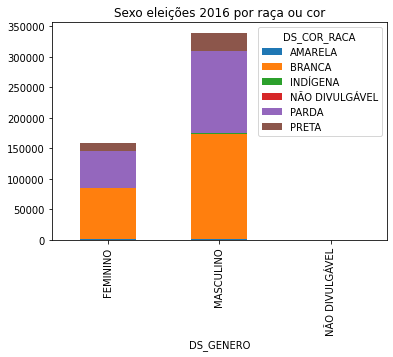

In [13]:
cand2016.groupby('DS_GENERO')['DS_COR_RACA'].value_counts().unstack().plot(kind='bar', stacked=True);

# plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (10,8);
plt.title('Sexo eleições 2016 por raça ou cor');

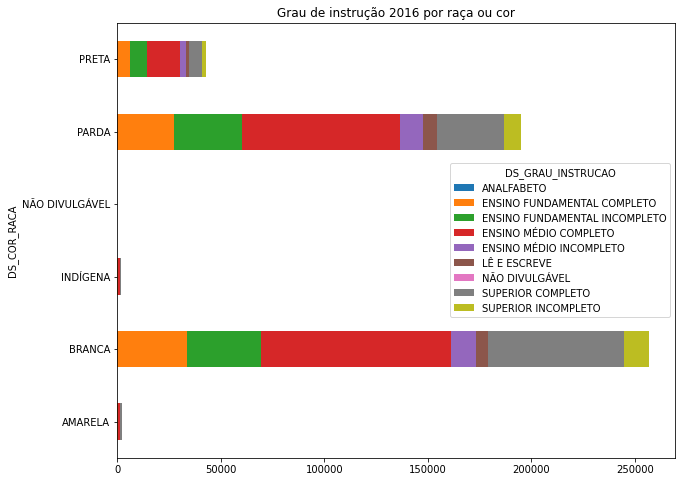

In [14]:
cand2016.groupby('DS_COR_RACA')['DS_GRAU_INSTRUCAO'].value_counts().unstack().plot(kind='barh', stacked=True);
# plt.xticks(rotation=40);
plt.rcParams["figure.figsize"] = (20,8);
plt.title('Grau de instrução 2016 por raça ou cor');

In [15]:
#Constsite no Valor máximo, em reais, de despesas de campanha declarada pelo partido
despesas=cand2016[['DS_COR_RACA', 'VR_DESPESA_MAX_CAMPANHA']].groupby('DS_COR_RACA').mean().sort_values('VR_DESPESA_MAX_CAMPANHA', ascending=False)
despesas


,VR_DESPESA_MAX_CAMPANHA
DS_COR_RACA,
PRETA,96797.549846
AMARELA,90195.019106
BRANCA,81168.864577
INDÍGENA,69928.330175
PARDA,67527.902897
NÃO DIVULGÁVEL,-4.000000


In [16]:
cand2016[cand2016['VR_DESPESA_MAX_CAMPANHA'] == cand2016['VR_DESPESA_MAX_CAMPANHA'].max()][['DS_GENERO', 'DS_COR_RACA', 'NM_CANDIDATO', 'DS_CARGO', 'VR_DESPESA_MAX_CAMPANHA']]


,DS_GENERO,DS_COR_RACA,NM_CANDIDATO,DS_CARGO,VR_DESPESA_MAX_CAMPANHA
5754,MASCULINO,BRANCA,ALTINO DE MELO PRAZERES JÚNIOR,PREFEITO,45470214.12
33647,MASCULINO,BRANCA,JOÃO BICO DE SOUZA,PREFEITO,45470214.12
47012,MASCULINO,BRANCA,JOSE LEVY FIDELIX DA CRUZ,PREFEITO,45470214.12
49456,FEMININO,BRANCA,MARTA TERESA SUPLICY,PREFEITO,45470214.12
111970,MASCULINO,BRANCA,CELSO UBIRAJARA RUSSOMANNO,PREFEITO,45470214.12
148983,MASCULINO,BRANCA,RICARDO YOUNG SILVA,PREFEITO,45470214.12
218427,MASCULINO,BRANCA,HENRIQUE ÁREAS DE ARAUJO,PREFEITO,45470214.12
372279,MASCULINO,PARDA,SERGIO OLIMPIO GOMES,PREFEITO,45470214.12
396992,MASCULINO,BRANCA,FERNANDO HADDAD,PREFEITO,45470214.12
406519,FEMININO,BRANCA,LUIZA ERUNDINA DE SOUSA,PREFEITO,45470214.12


In [17]:
cand2016[cand2016["NM_URNA_CANDIDATO"] == 'FERNANDO HADDAD'][['NM_CANDIDATO','DS_GENERO', 'DS_COR_RACA','' 'DS_CARGO', 'NM_UE', 'SG_UF', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO']]

,NM_CANDIDATO,DS_GENERO,DS_COR_RACA,DS_CARGO,NM_UE,SG_UF,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO
396992,FERNANDO HADDAD,MASCULINO,BRANCA,PREFEITO,SÃO PAULO,SP,45470214.12,NÃO ELEITO


# ***2020***

In [19]:
selecao_situacao=cand2020['DS_SITUACAO_CANDIDATURA']=="INAPTO"
situacao=cand2020[selecao_situacao]
quantidade_total_de_candidatos=cand2020.shape[0]
quantidade_de_candidatos_inaptos=situacao.shape[0]

print("{} candidatos de um total de {} estão inaptos a concorrer.". format(quantidade_de_candidatos_inaptos,quantidade_total_de_candidatos))


26167 candidatos de um total de 558313 estão inaptos a concorrer.


In [20]:
cand2020['NM_UE'].nunique()
## O Brasil tem 5570 municípios. Em 275 cidades os dados do TSE não estavam preenchidos em 03/05/2022

5295

In [21]:
cand2020['DS_CARGO'].value_counts()

VEREADOR         518485
VICE-PREFEITO     20134
PREFEITO          19694
Name: DS_CARGO, dtype: int64

In [22]:
cand2020['DS_COR_RACA'].value_counts()

BRANCA            268368
PARDA             220401
PRETA              58716
NÃO INFORMADO       6367
INDÍGENA            2218
AMARELA             1964
NÃO DIVULGÁVEL       279
Name: DS_COR_RACA, dtype: int64

In [23]:
cand2020[cand2020['DS_COR_RACA']=='PRETA']['NR_IDADE_DATA_POSSE'].count()

58716

In [24]:
cand2020['DS_GENERO'].value_counts()

MASCULINO         370877
FEMININO          187157
NÃO DIVULGÁVEL       279
Name: DS_GENERO, dtype: int64

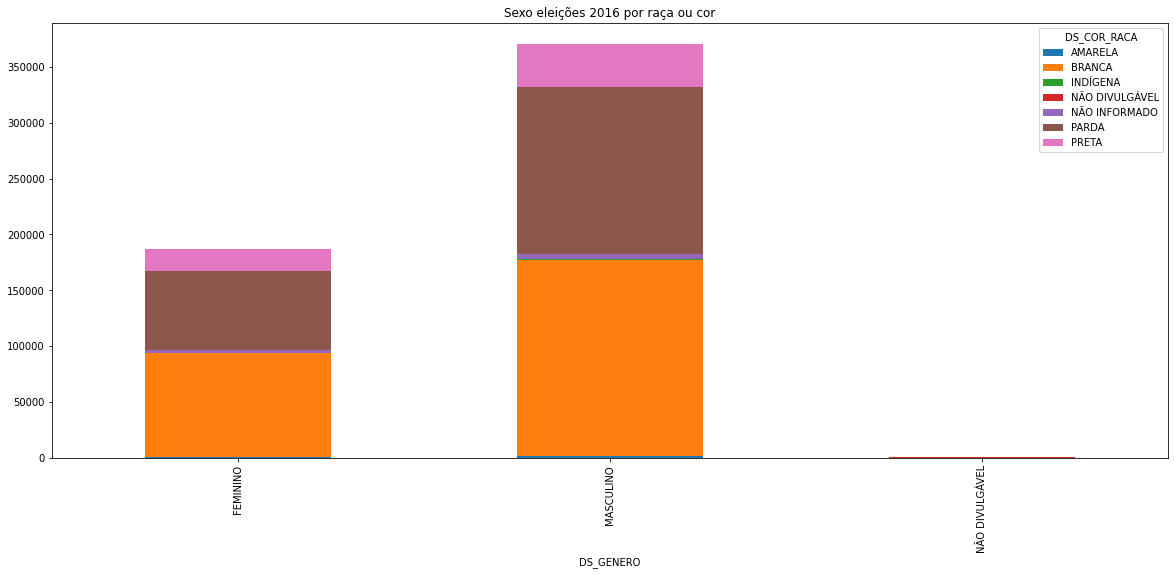

In [25]:
cand2020.groupby('DS_GENERO')['DS_COR_RACA'].value_counts().unstack().plot(kind='bar', stacked=True);

# plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (12,8);
plt.title('Sexo eleições 2016 por raça ou cor');

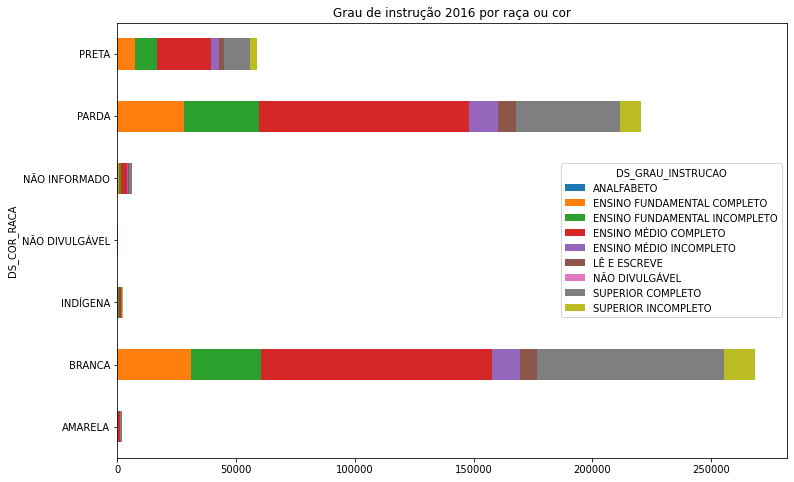

In [26]:
cand2020.groupby('DS_COR_RACA')['DS_GRAU_INSTRUCAO'].value_counts().unstack().plot(kind='barh', stacked=True);
# plt.xticks(rotation=40);
plt.rcParams["figure.figsize"] = (20,8);
plt.title('Grau de instrução 2016 por raça ou cor');

In [27]:
#Constsite no Valor máximo, em reais, de despesas de campanha declarada pelo partido
despesas=cand2020[['DS_COR_RACA', 'VR_DESPESA_MAX_CAMPANHA']].groupby('DS_COR_RACA').mean().sort_values('VR_DESPESA_MAX_CAMPANHA', ascending=False)
despesas


,VR_DESPESA_MAX_CAMPANHA
DS_COR_RACA,
PRETA,125589.793954
AMARELA,121195.215362
BRANCA,104280.364762
PARDA,85264.425436
NÃO INFORMADO,78037.391407
INDÍGENA,69612.716132
NÃO DIVULGÁVEL,-4.000000


In [28]:
cand2020[cand2020['VR_DESPESA_MAX_CAMPANHA'] == cand2020['VR_DESPESA_MAX_CAMPANHA'].max()][['DS_GENERO', 'DS_COR_RACA', 'NM_CANDIDATO', 'DS_CARGO', 'VR_DESPESA_MAX_CAMPANHA']]

,DS_GENERO,DS_COR_RACA,NM_CANDIDATO,DS_CARGO,VR_DESPESA_MAX_CAMPANHA
32099,MASCULINO,BRANCA,ARTHUR MOLEDO DO VAL,PREFEITO,51799383.68
36429,MASCULINO,BRANCA,CELSO UBIRAJARA RUSSOMANNO,PREFEITO,51799383.68
148573,MASCULINO,PRETA,ANTÔNIO CARLOS SILVA,PREFEITO,51799383.68
149076,MASCULINO,BRANCA,ANGELO ANDREA MATARAZZO,PREFEITO,51799383.68
159450,MASCULINO,BRANCA,MÁRCIO LUIZ FRANÇA GOMES,PREFEITO,51799383.68
190332,MASCULINO,BRANCA,GUILHERME CASTRO BOULOS,PREFEITO,51799383.68
276246,MASCULINO,PRETA,ORLANDO SILVA DE JESUS JUNIOR,PREFEITO,51799383.68
290337,MASCULINO,BRANCA,FILIPE TOMAZELLI SABARA,PREFEITO,51799383.68
307489,FEMININO,BRANCA,JOICE CRISTINA HASSELMANN,PREFEITO,51799383.68
423262,MASCULINO,BRANCA,JILMAR AUGUSTINHO TATTO,PREFEITO,51799383.68


In [29]:
cand2020[cand2020["NM_URNA_CANDIDATO"] == 'JAIR BOLSONARO'][['NM_CANDIDATO','DS_GENERO', 'DS_COR_RACA','' 'DS_CARGO', 'NM_UE', 'SG_UF', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO']]

,NM_CANDIDATO,DS_GENERO,DS_COR_RACA,DS_CARGO,NM_UE,SG_UF,VR_DESPESA_MAX_CAMPANHA,DS_SIT_TOT_TURNO
259114,JAIR SOUSA SILVA,MASCULINO,PARDA,VEREADOR,LARANJAL DO JARI,AP,16660.31,NÃO ELEITO


# ***2016-2020***

In [30]:
df_final = pd.concat([cand2016,cand2020], axis=0)

In [ ]:
grafico_cor = ['#7BD5F5', '#787FF6'] 
df_final.groupby('DS_COR_RACA')['ANO_ELEICAO'].value_counts().unstack().plot(kind='barh', stacked=True, color=grafico_cor);

# plt.xticks(rotation=60)
plt.rcParams["figure.figsize"] = (10,10);
plt.title('Faixa etária do eleiorado 2022 por gênero.');

In [ ]:
grafico_cor = ['#2F4F4F', '#ffff99'] 

fig, ax = plt.subplots(figsize=(10,8))
plt.title('Eleitorado 2018 x 2020 por faixa etária')
ax = sns.countplot(x = 'DS_GENERO', hue = 'ANO_ELEICAO', data = df_final)
ax.set_xlabel('Iade')
ax.set_ylabel('Ano')
plt.show()